In [9]:
import pandas as pd
import numpy as np
!pip install lazypredict -q
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/ipo2.csv')
df.head(2)

,COMPANY NAME,Listing date,Lisiting Date,Lisiting Month,Lisiting Year,Issue Size,Issue Price,QIB,HNI,retail,total Subscription,Listing Open (Rs),Listing Close (Rs),Listing Gain %,LTP (Rs),Current Gain %,Status
0,Ecellent Wires and Packaging Ltd.,19-Sep-24,19,9,2024,12.6,90.0,0.0,8.4,30.4,19.4,85.0,82.0,-9%,78.0,-13%,Loss
1,Innomet Advanced Materials Ltd.,18-Sep-24,18,9,2024,34.2,100.0,0.0,299,215.6,282.5,190.0,199.5,100%,219.9,120%,Profit


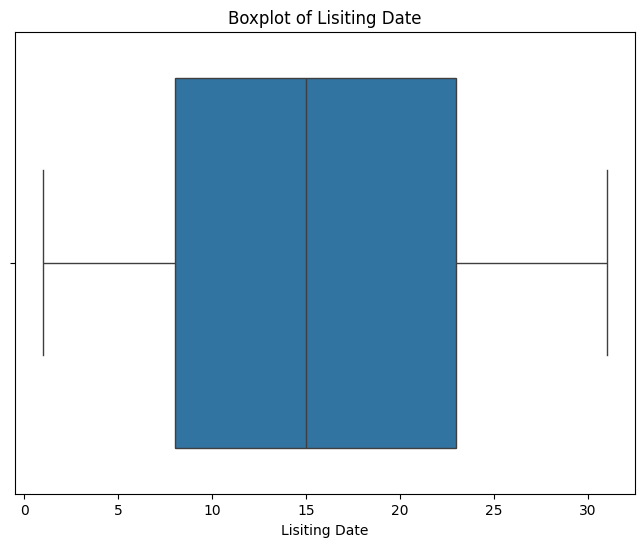

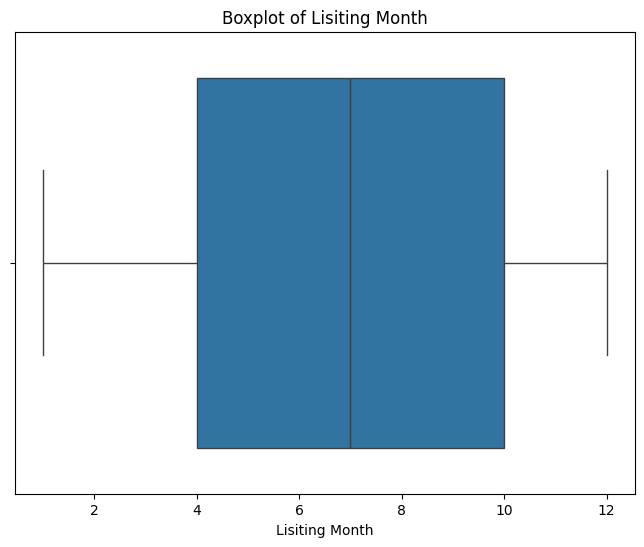

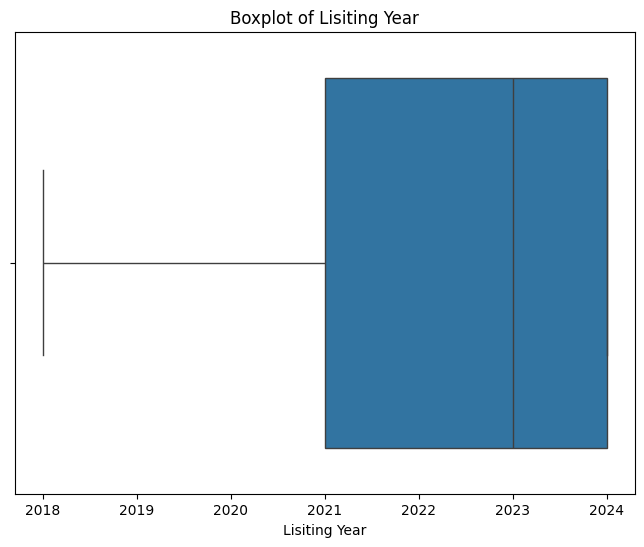

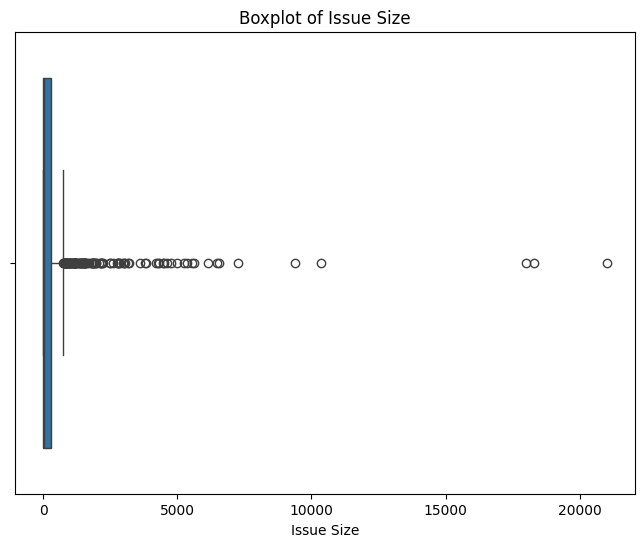

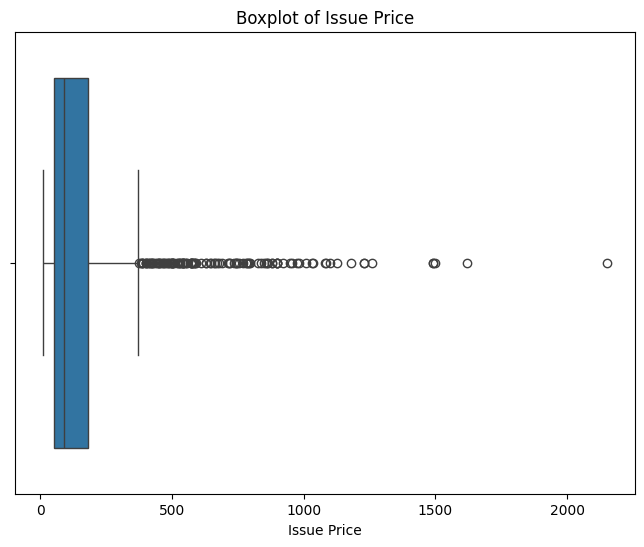

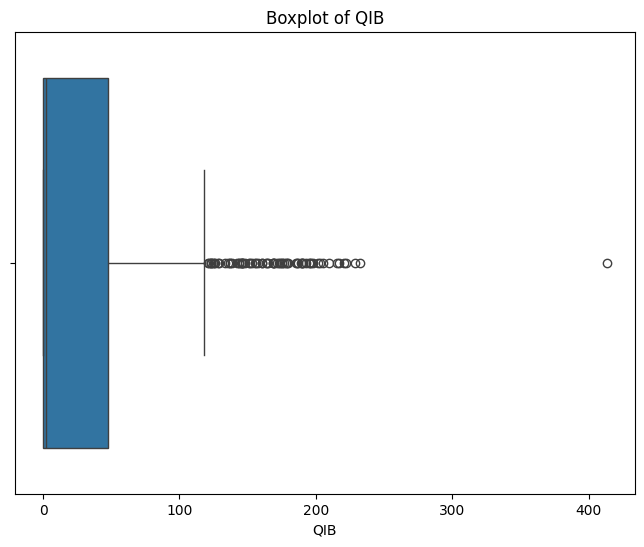

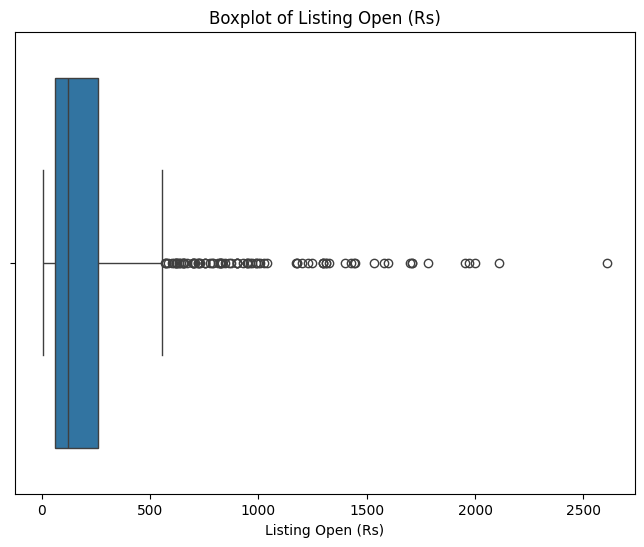

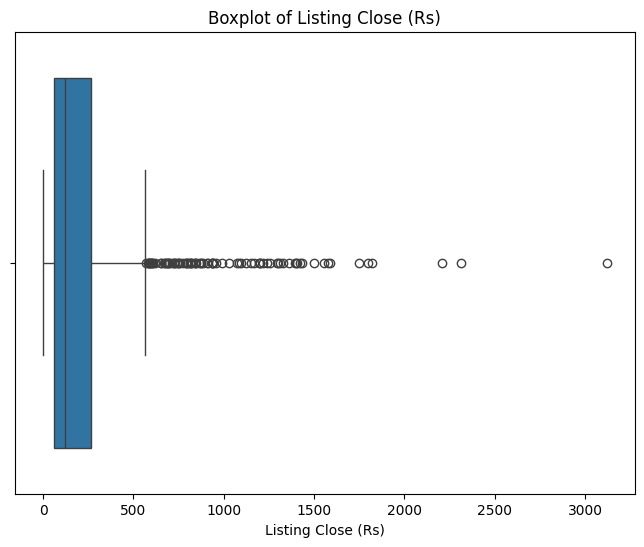

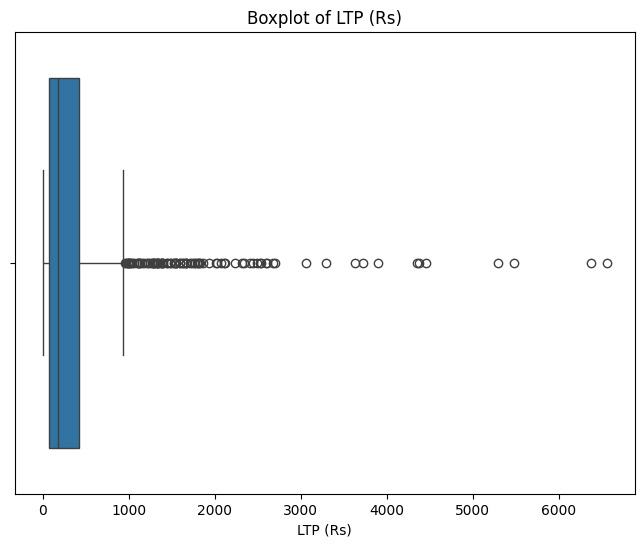

In [3]:
# prompt: check outliers present in the data plot also

import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numerical columns and create boxplots to visualize outliers
for column in df.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [44]:
import pandas as pd

def remove_outliers(df, columns):
    """
    Removes outliers from the specified columns in the DataFrame using the IQR method.

    Args:
    df (pd.DataFrame): The input DataFrame.
    columns (list): A list of columns to check for outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define a mask to filter out outliers
    mask = ~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Return the DataFrame with outliers removed
    return df[mask]

# Example usage with a DataFrame (assuming your dataset is loaded in df)
columns_to_check = ['Issue Price', 'Issue Size', 'HNI', 'retail', 'total Subscription']  # Specify columns to check for outliers
df_clean = remove_outliers(df, columns_to_check)

# Now, df_clean has outliers removed for the specified columns
df_clean.shape

(554, 17)

In [45]:
df2 =df_clean
df2['HNI'] = pd.to_numeric(df2['HNI'], errors='coerce')
df2['retail'] = pd.to_numeric(df2['retail'], errors='coerce')
df2['total Subscription'] = pd.to_numeric(df2['total Subscription'], errors='coerce')

In [59]:
df2 = df2.dropna()
# df2 = df.drop(['COMPANY NAME','Listing date','Lisiting Date','Listing Gain %','Current Gain %','Status','Listing Close (Rs)','LTP (Rs)','QIB','Lisiting Month','Lisiting Year'], axis=1)
df2 = df.drop(['COMPANY NAME','Listing date','Lisiting Date','Listing Gain %','Current Gain %','Listing Open (Rs)', 'Listing Close (Rs)','LTP (Rs)','QIB','Lisiting Month','Lisiting Year'], axis=1)



In [60]:

X = df2.drop('Status', axis=1)
y = df2['Status']

In [61]:

df2 = df2.dropna()

from sklearn.preprocessing import MinMaxScaler

# Select numerical features for normalization
numerical_features = X.select_dtypes(include=np.number).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Print the normalized DataFrame
X.head()


,Issue Size,Issue Price,HNI,retail,total Subscription
0,0.00,0.04,0.00,0.01,0.01
1,0.00,0.04,0.12,0.09,0.15
2,0.05,0.22,0.02,0.01,0.03
3,0.00,0.02,0.01,0.02,0.02
4,0.02,0.11,0.01,0.00,0.01


In [62]:
# prompt: drop null values in the columns

X = X.dropna()
y = y[X.index]


In [50]:
X.isnull().sum()

,0
Issue Size,0
Issue Price,0
HNI,0
retail,0
total Subscription,0


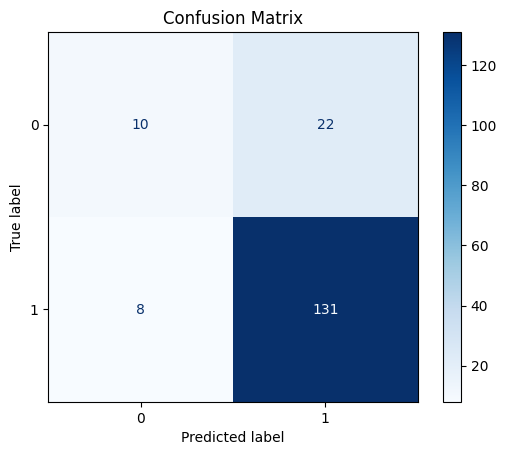

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the Random Forest model
# model = GradientBoostingRegressor()
model = GradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



In [52]:
X.columns

Index(['Issue Size', 'Issue Price', 'HNI', 'retail', 'total Subscription'], dtype='object')

In [53]:
model

GradientBoostingRegressor()

In [54]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Assuming you already have a trained model and fitted scaler
# model = your trained RandomForestRegressor model
# scaler = your fitted MinMaxScaler

def predict_listing_open(input_data, model, scaler):
    """Predicts Listing Open (Rs) based on user input.

    Args:
        input_data: A dictionary containing the input features.
        model: The pre-trained RandomForestRegressor model.
        scaler: The fitted MinMaxScaler for feature scaling.

    Returns:
        The predicted Listing Open (Rs).
    """

    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Scale the input data using the pre-fitted scaler
    input_df_scaled = scaler.transform(input_df)

    # Predict using the pre-trained model
    prediction = model.predict(input_df_scaled)

    return prediction[0]

# Example usage with existing model and scaler:
user_input = {
    'Issue Size': 12.6,
    'Issue Price': 90,
    'HNI': 8.4,
    'retail': 30.4,
    'total Subscription': 19,
    # Add other features as needed
}

# Assuming you already have your trained model and fitted scaler
predicted_listing_open = predict_listing_open(user_input, model, scaler)
print(f"Predicted Listing Open (Rs): {predicted_listing_open}")


Predicted Listing Open (Rs): 2687.422392422243


In [56]:
# prompt: use lazypredict

from lazypredict.Supervised import LazyRegressor

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Print the performance table



100%|██████████| 42/42 [00:04<00:00,  9.17it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 682, number of used features: 5
[LightGBM] [Info] Start training from score 229.668328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [57]:
print(models)

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
GradientBoostingRegressor                    0.95       0.95   73.30   
RandomForestRegressor                        0.94       0.94   81.67   
ExtraTreesRegressor                          0.94       0.94   83.08   
LGBMRegressor                                0.94       0.94   84.22   
HistGradientBoostingRegressor                0.93       0.93   85.56   
BaggingRegressor                             0.93       0.93   87.50   
XGBRegressor                                 0.92       0.92   93.43   
LassoCV                                      0.91       0.91   99.51   
TransformedTargetRegressor                   0.91       0.91   99.52   
OrthogonalMatchingPursuitCV                  0.91       0.91   99.52   
LarsCV                                       0.91       0.91   99.52   
LinearRegression                             0.91       0.91   9

In [58]:
# prompt: use GradientBoostingRegressor in pipeline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Create a pipeline with MinMaxScaler and GradientBoostingRegressor
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingRegressor())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 5131.023453860139
R-squared: 0.9543894245184038


In [36]:
# prompt: how to reduce means squared error

# Hyperparameter Tuning with GridSearchCV or RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define parameter grid for GradientBoostingRegressor
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 0.9, 1.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Feature Engineering: Explore interactions between features, create new features, or remove irrelevant features.
# Data Cleaning: Address missing values, outliers, and inconsistencies in the data.
# Model Selection: Try different regression models and compare their performance.
# Regularization: L1 or L2 regularization can be applied to reduce overfitting.
# Ensemble Methods: Combining predictions from multiple models can improve performance.


Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.8}
Mean Squared Error: 5875.357034525692
R-squared: 0.9477729116005196
